In [2]:
import pandas as pd
from copy import deepcopy
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

# plt.switch_backend('Qt5Agg')
# %matplotlib

# plt.rcParams['figure.figsize'] = [20, 10]
# font = {'weight' : 'normal',
#         'size'   : 24}
# dpi = 300
# matplotlib.rc('font', **font)

def ci(data):
    sdata = sorted(data.dropna())
    n = len(sdata)
    # z = 1.96 # 95%
    z = 2.576 # 99%
    # z = 3.291 # 99.9%
    lower_pos = math.floor((n - z*math.sqrt(n))/2)
    upper_pos = math.ceil(1 + (n + z*math.sqrt(n))/2)
    return sdata[lower_pos-1], sdata[upper_pos-1]

def calculate_ci(df):
    cols_to_use = [i for i in range(1, 20)]
    df['min_time']    = df.loc[:, cols_to_use].min(axis=1, skipna=True)
    df['max_time']    = df.loc[:, cols_to_use].max(axis=1, skipna=True)
    df['median_time'] = df.loc[:, cols_to_use].median(axis=1, skipna=True)
    df['mean_time']   = df.loc[:, cols_to_use].mean(axis=1, skipna=True)
    df['std_time']    = df.loc[:, cols_to_use].std(axis=1, skipna=True)
    
    df['ci']               = df.loc[:, cols_to_use].apply(lambda x: ci(x), axis=1)
    df[['cimin', 'cimax']] = pd.DataFrame(df['ci'].tolist(), index=df.index)
    df['cimin_p']          = df['cimin']    / df['median_time']
    df['cimax_p']          = df['cimax']    / df['median_time']
    
    return df


In [14]:
threads = 1
df_m = pd.read_csv('../results/matlab_{}.txt'.format(threads), delimiter='\t')
df_j = pd.read_csv('../results/julia_{}.txt'.format(threads), delimiter=';')
df_c = pd.read_csv('../results/c_{}.txt'.format(threads), delimiter=';')
df_cppa = pd.read_csv('../results/armadillo_{}.txt'.format(threads), delimiter=';')
df_cppe = pd.read_csv('../results/eigen_{}.txt'.format(threads), delimiter=';')
df_py = pd.read_csv('../results/python_{}.txt'.format(threads), delimiter=';')
df_r = pd.read_csv('../results/R_{}.txt'.format(threads), delimiter=';')
df_o = pd.read_csv('../results/octave_{}.txt'.format(threads), delimiter=';')
# df_temp['algorithm'] = df_temp['algorithm'].apply(lambda x: x.split('_')[0]+'_implicit')
# df_c = df_c.append(df_temp, ignore_index=True)

df_merged = pd.merge(df_m[['algorithm', 'Min']], df_j[['algorithm','Julia']], on='algorithm', how='outer')
df_merged.rename(columns={'Min': 'Matlab'}, inplace=True)

df_merged = pd.merge(df_merged, df_c[['algorithm','C']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_cppa[['algorithm','Armadillo']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_cppe[['algorithm','Eigen']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_py[['algorithm','Python']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_r[['algorithm','R']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_o[['algorithm','Min']], on='algorithm', how='outer')
df_merged.rename(columns={'Min': 'Octave'}, inplace=True)
df_merged.rename(columns={'Armadillo': 'Arma'}, inplace=True)

df_merged = df_merged.reindex(columns=['algorithm', 'C', 'Arma', 'Eigen', 'Julia', 'Matlab', 'Python', 'Octave', 'R'])
df_merged = df_merged.set_index(['algorithm'])
# df_merged
# df_merged.sort_values('algorithm').reset_index(drop=True)

In [15]:
df_j_t = pd.read_csv('../results/julia_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_m_t = pd.read_csv('../results/matlab_{}_timings.txt'.format(threads), delimiter='\t', header=None, skiprows=1)
df_cppa_t = pd.read_csv('../results/armadillo_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_cppe_t = pd.read_csv('../results/eigen_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_py_t = pd.read_csv('../results/python_{}_timings.txt'.format(threads), delimiter=';', header=None)
df_r_t = pd.read_csv('../results/R_{}_timings.txt'.format(threads), delimiter=';', header=None)
# print(df_merged.reset_index(drop=True).replace(np.NaN, '-'))

In [22]:
keywords = ['solve_nai', 'solve_rec', 'solve_sym', 'solve_spd', 'solve_tri', 'solve_dia']
df_merged.loc[keywords].reindex(keywords).round(3)

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
solve_nai,1.742,0.726,2.300,1.789,1.859,2.313,1.898,2.272
solve_rec,0.698,0.726,0.738,0.726,0.809,0.757,0.825,0.762
solve_sym,0.570,0.726,0.738,0.725,0.811,0.759,0.821,0.767
solve_spd,0.407,0.466,0.713,0.699,0.506,0.733,0.517,0.752
solve_tri,0.078,0.110,0.738,0.084,0.086,0.759,0.094,0.733
solve_dia,0.004,0.045,0.711,0.018,0.085,0.733,0.101,0.725


In [32]:
keywords = ['gemm_explicit', 'gemm_implicit_noup', 'gemm_implicit_compact', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
gemm_explicit,1.426,-,-,1.429,-,1.500,-,-
gemm_implicit_noup,1.423,1.428,1.459,1.442,1.441,1.444,1.477,1.469
gemm_implicit_compact,-,1.429,1.459,1.471,-,1.458,1.507,-
gemm_implicit,1.426,1.456,1.459,1.471,1.455,1.458,1.506,1.498
gemm_implicit_coeff,-,1.456,1.459,1.497,1.48,1.482,1.532,1.507
gemm_implicit_double_coeff,-,1.456,1.459,1.520,1.479,1.506,1.556,1.515


In [35]:
keywords = ['gemm_explicit', 'syrk_explicit', 'syrk_explicit_noup', 'syrk_implicit_noup', 'syrk_implicit_compact', 'syrk_implicit']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
gemm_explicit,1.426,-,-,1.429,-,1.5,-,-
syrk_explicit,0.731,-,-,0.731,-,0.767,-,-
syrk_explicit_noup,0.732,-,-,0.731,-,-,-,-
syrk_implicit_noup,-,0.742,1.569,0.755,0.763,0.763,0.778,1.511
syrk_implicit_compact,-,0.769,1.569,0.807,-,0.775,0.809,-
syrk_implicit,-,0.77,1.567,0.799,0.776,0.775,0.809,1.539


In [36]:
keywords = ['gemm_explicit', 'syr2k_explicit', 'syr2k_explicit_noup', 'syr2k_implicit_noup', 'syr2k_implicit_compact', 'syr2k_implicit']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
gemm_explicit,1.426,-,-,1.429,-,1.5,-,-
syr2k_explicit,1.47,-,-,1.471,-,1.537,-,-
syr2k_explicit_noup,1.469,-,-,1.470,-,-,-,-
syr2k_implicit_noup,-,2.909,2.892,2.921,2.905,2.891,2.989,3.035
syr2k_implicit_compact,-,2.91,2.892,2.972,-,2.907,3.02,-
syr2k_implicit,-,2.909,2.916,2.964,2.903,2.906,3.02,3.064


In [39]:
keywords = ['trmm_explicit', 'trmm_implicit', 'trmm_implicit_compact', 'diagmm']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
trmm_explicit,0.726,-,-,0.727,-,0.763,-,-
trmm_implicit,0.726,1.442,1.459,1.441,1.438,1.446,1.477,1.469
trmm_implicit_compact,-,1.442,1.459,1.442,-,-,-,-
diagmm,0.064,1.429,1.459,1.442,1.441,1.445,1.477,1.468


In [41]:
keywords = ['mc_l_r_orig', 'mc_l_r_guid', 'mc_r_l_orig', 'mc_r_l_guid', 'mc_mixed_orig', 'mc_mixed_guid']
df_merged.loc[keywords].reindex(keywords).round(2).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
mc_l_r_orig,-,0.59,0.59,0.59,0.58,0.60,0.59,0.62
mc_l_r_guid,-,0.59,0.59,0.58,0.58,0.60,0.59,0.62
mc_r_l_orig,-,0.60,1.75,1.74,1.74,1.74,1.77,1.77
mc_r_l_guid,-,0.60,0.60,0.59,0.59,0.59,0.60,0.63
mc_mixed_orig,-,2.04,2.07,2.05,2.04,2.05,2.09,2.07
mc_mixed_guid,0.88,0.89,0.92,0.90,0.89,0.91,0.92,0.92


In [42]:
keywords = ['subexpr_nai', 'subexpr_rec']
df_merged.loc[keywords].reindex(keywords).round(2).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
subexpr_nai,2.87,2.90,2.89,2.91,2.90,2.90,2.99,2.95
subexpr_rec,1.43,1.44,1.47,1.47,1.45,1.47,1.50,1.49


In [43]:
keywords = ['loop_nai', 'loop_rec']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
loop_nai,-,0.457,0.488,0.461,0.458,0.467,0.466,0.546
loop_rec,-,0.002,0.002,0.002,0.002,0.002,0.005,0.002


In [44]:
keywords = ['compact', 'blocked']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
compact,-,0.021,0.022,0.021,0.024,0.024,0.024,0.024
blocked,-,0.011,0.011,0.011,0.013,0.012,0.013,0.014


In [45]:
keywords = ['add', 'scal']
df_merged.loc[keywords].reindex(keywords).round(3).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
add,-,0.013,0.013,0.029,0.028,0.029,0.029,0.029
scal,-,0.008,0.008,0.023,0.023,0.024,0.024,0.024


In [47]:
keywords = ['tr_nn_implicit', 'tr_nt_implicit', 'tr_tn_implicit', 'tr_tt_implicit', 'tr_nn_explicit', 'tr_nt_explicit', 'tr_tn_explicit', 'tr_tt_explicit']
df_merged.loc[keywords].reindex(keywords).round(4).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
tr_nn_implicit,-,0.0016,0.0018,0.0017,0.0017,0.0018,0.0017,0.002
tr_nt_implicit,-,0.0017,0.0019,0.0017,0.0017,0.0018,0.0018,0.0023
tr_tn_implicit,-,0.0016,0.0018,0.0017,0.0017,0.0018,0.0017,0.0022
tr_tt_implicit,-,0.0017,0.0018,0.0017,0.0017,0.0018,0.0027,0.0026
tr_nn_explicit,0.0017,-,-,0.0017,-,0.0020,-,-
tr_nt_explicit,0.0017,-,-,0.0017,-,0.0020,-,-
tr_tn_explicit,0.0016,-,-,0.0017,-,0.0020,-,-
tr_tt_explicit,0.0017,-,-,0.0017,-,0.0020,-,-


In [51]:
keywords = ['diag_add_nai', 'diag_add_rec', 'diag_mult_nai', 'gemm_explicit']
df_merged.loc[keywords].reindex(keywords).round(4).replace(np.NaN, '-')

,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
algorithm,,,,,,,,
diag_add_nai,-,0.0001,0.0001,0.0291,0.0296,0.0285,0.0289,0.0282
diag_add_rec,-,0.0001,0.0001,0.0001,0.0001,0.0005,0.0001,0.0002
diag_mult_nai,-,0.0326,0.0261,1.4425,1.4426,1.4437,1.4767,1.4566
gemm_explicit,1.4257,-,-,1.4285,-,1.4998,-,-


In [18]:
# dataframes = [df_j_t, df_m_t, df_cppa_t, df_cppe_t, df_py_t, df_r_t]
# for i, d in enumerate(dataframes):
#     dataframes[i] = calculate_ci(dataframes[i])
# df_merged_t = pd.merge(df_j_t[[0, 'ci']], df_m_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_cppa_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_cppe_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_py_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_r_t[[0, 'ci']], on=0, how='outer')

# df_merged_t.columns = ['algorithm', 'Julia', 'Matlab', 'Arma', 'Eigen', 'Python', 'R']
# df_merged_t

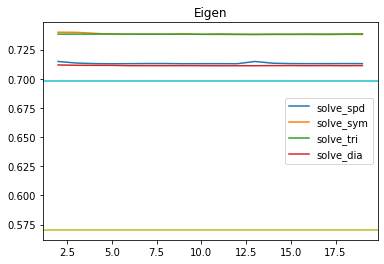

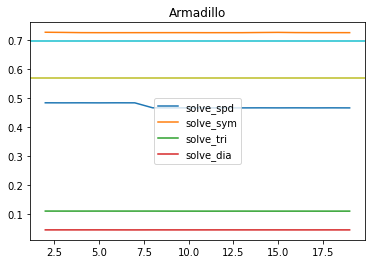

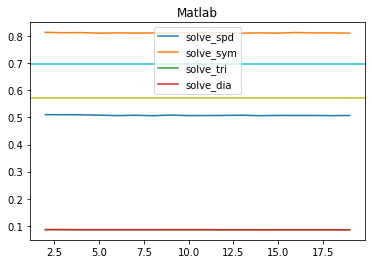

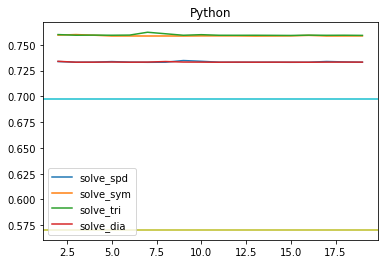

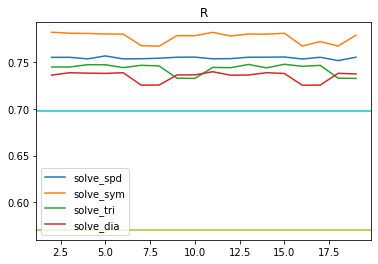

In [43]:
ddf_l = [df_cppe_t, df_cppa_t, df_m_t, df_py_t, df_r_t]
name = ['Eigen', 'Armadillo', 'Matlab', 'Python', 'R']
for i, ddf in enumerate(ddf_l):
    fig, ax = plt.subplots()
    cols_to_use = [i for i in range(2, 20)]
    keywords = ['solve_spd', 'solve_sym', 'solve_tri', 'solve_dia']
    for key in keywords:
        ddf[ddf[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
    ax.axhline(y=df_merged[df_merged['algorithm'].isin(['solve_rec'])].loc[:, ['C']].iloc[0,0], color='C9')
    ax.axhline(y=df_merged[df_merged['algorithm'].isin(['solve_sym'])].loc[:, ['C']].iloc[0,0], color='C8')
    ax.legend(keywords)
    ax.set_title(name[i])

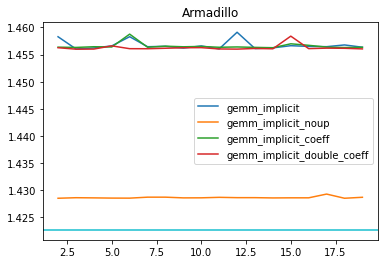

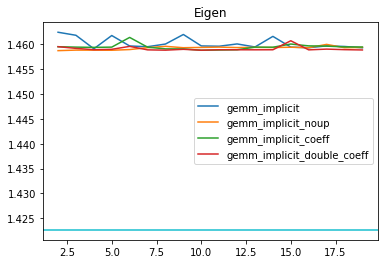

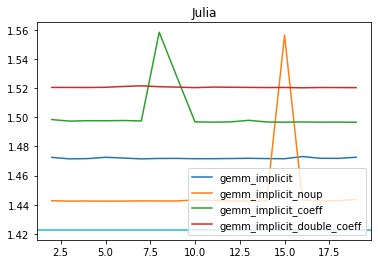

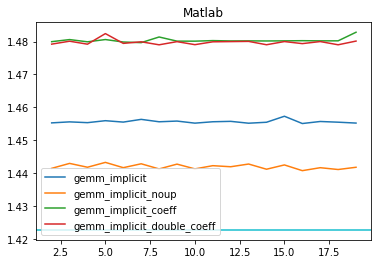

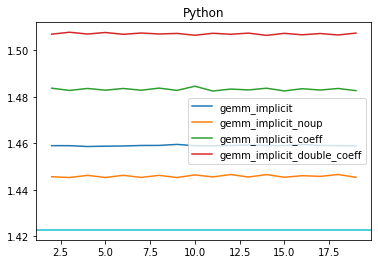

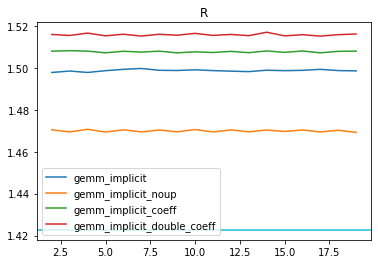

In [5]:
ddf_l = [df_cppa_t, df_cppe_t, df_j_t, df_m_t, df_py_t, df_r_t]
name = ['Armadillo', 'Eigen', 'Julia', 'Matlab', 'Python', 'R']
for i, ddf in enumerate(ddf_l):
    fig, ax = plt.subplots()
    cols_to_use = [i for i in range(2, 20)]
    keywords = ['gemm_implicit', 'gemm_implicit_noup', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff']
    for key in keywords:
        ddf[ddf[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
    ax.axhline(y=df_merged[df_merged['algorithm'].isin(['gemm_explicit_noup'])].loc[:, ['C']].iloc[0,0], color='C9')
    ax.legend(keywords)
    ax.set_title(name[i])